In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
import matplotlib.pyplot as plt


# Initial stuff

In [2]:

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

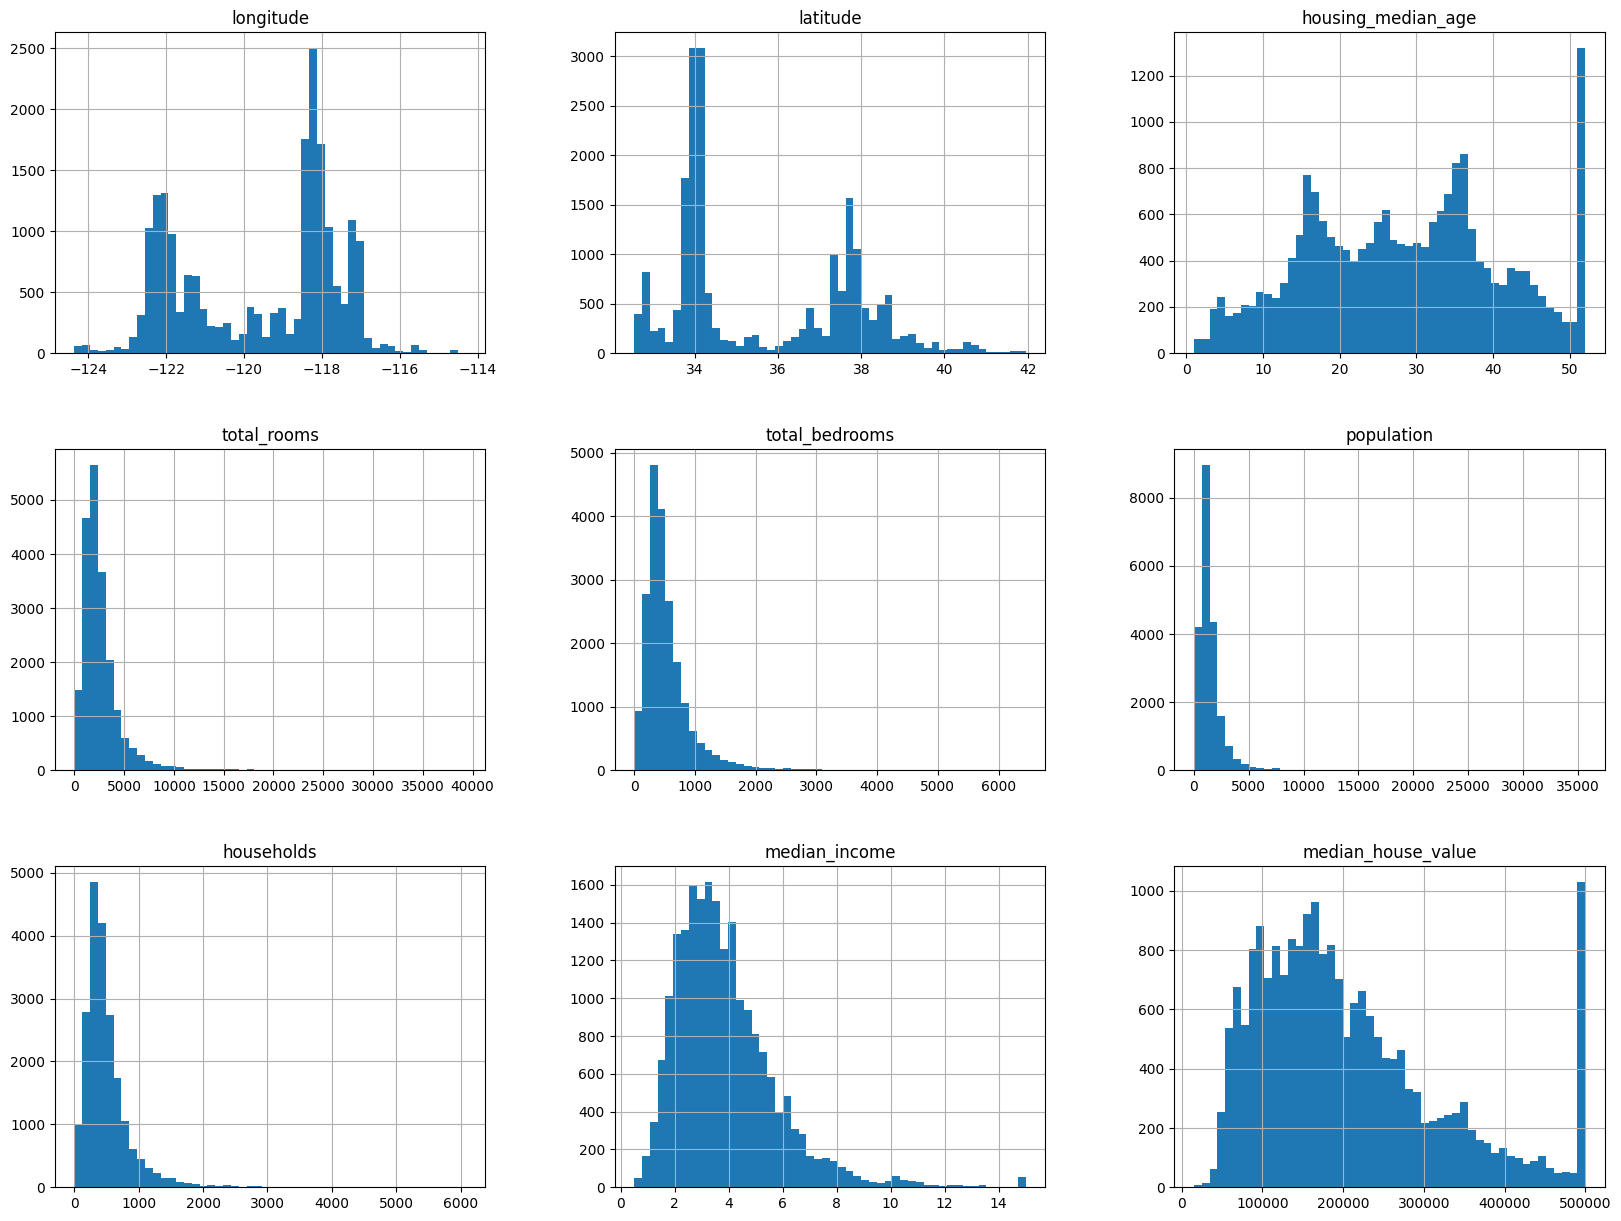

In [7]:
housing.hist(bins=50, figsize=(20,15))

# Creating a test set

In [8]:
from sklearn.model_selection import train_test_split

# random
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


# stratified by income

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0.,1.5,3.,4.5,6., np.inf],
                               labels=[1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []

for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_splits.append([housing.iloc[train_index], housing.iloc[test_index]])

strat_train_set, strat_test_set = strat_splits[0]

# easier stratified

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)


# Exploring data

In [9]:
housing:pd.DataFrame = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

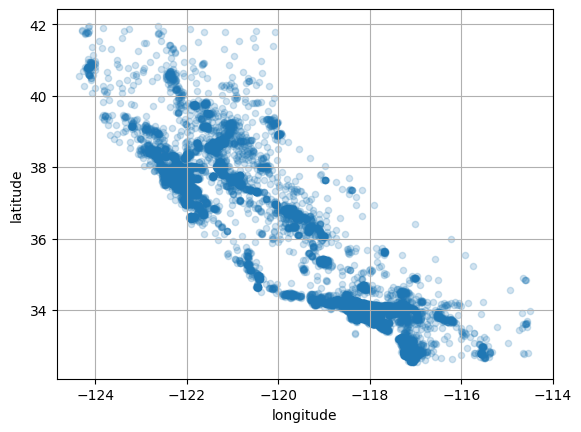

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

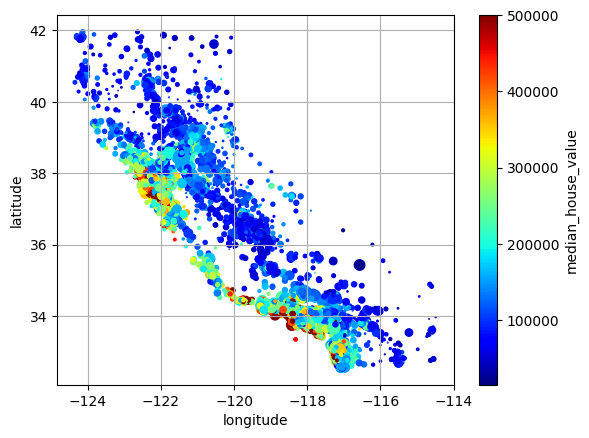

In [11]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True,
             s=housing["population"]/120,
             c="median_house_value",
             cmap="jet",
             colorbar=True,
             legend=True)

In [12]:
corr_matrix = housing.select_dtypes(["float64"]).corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

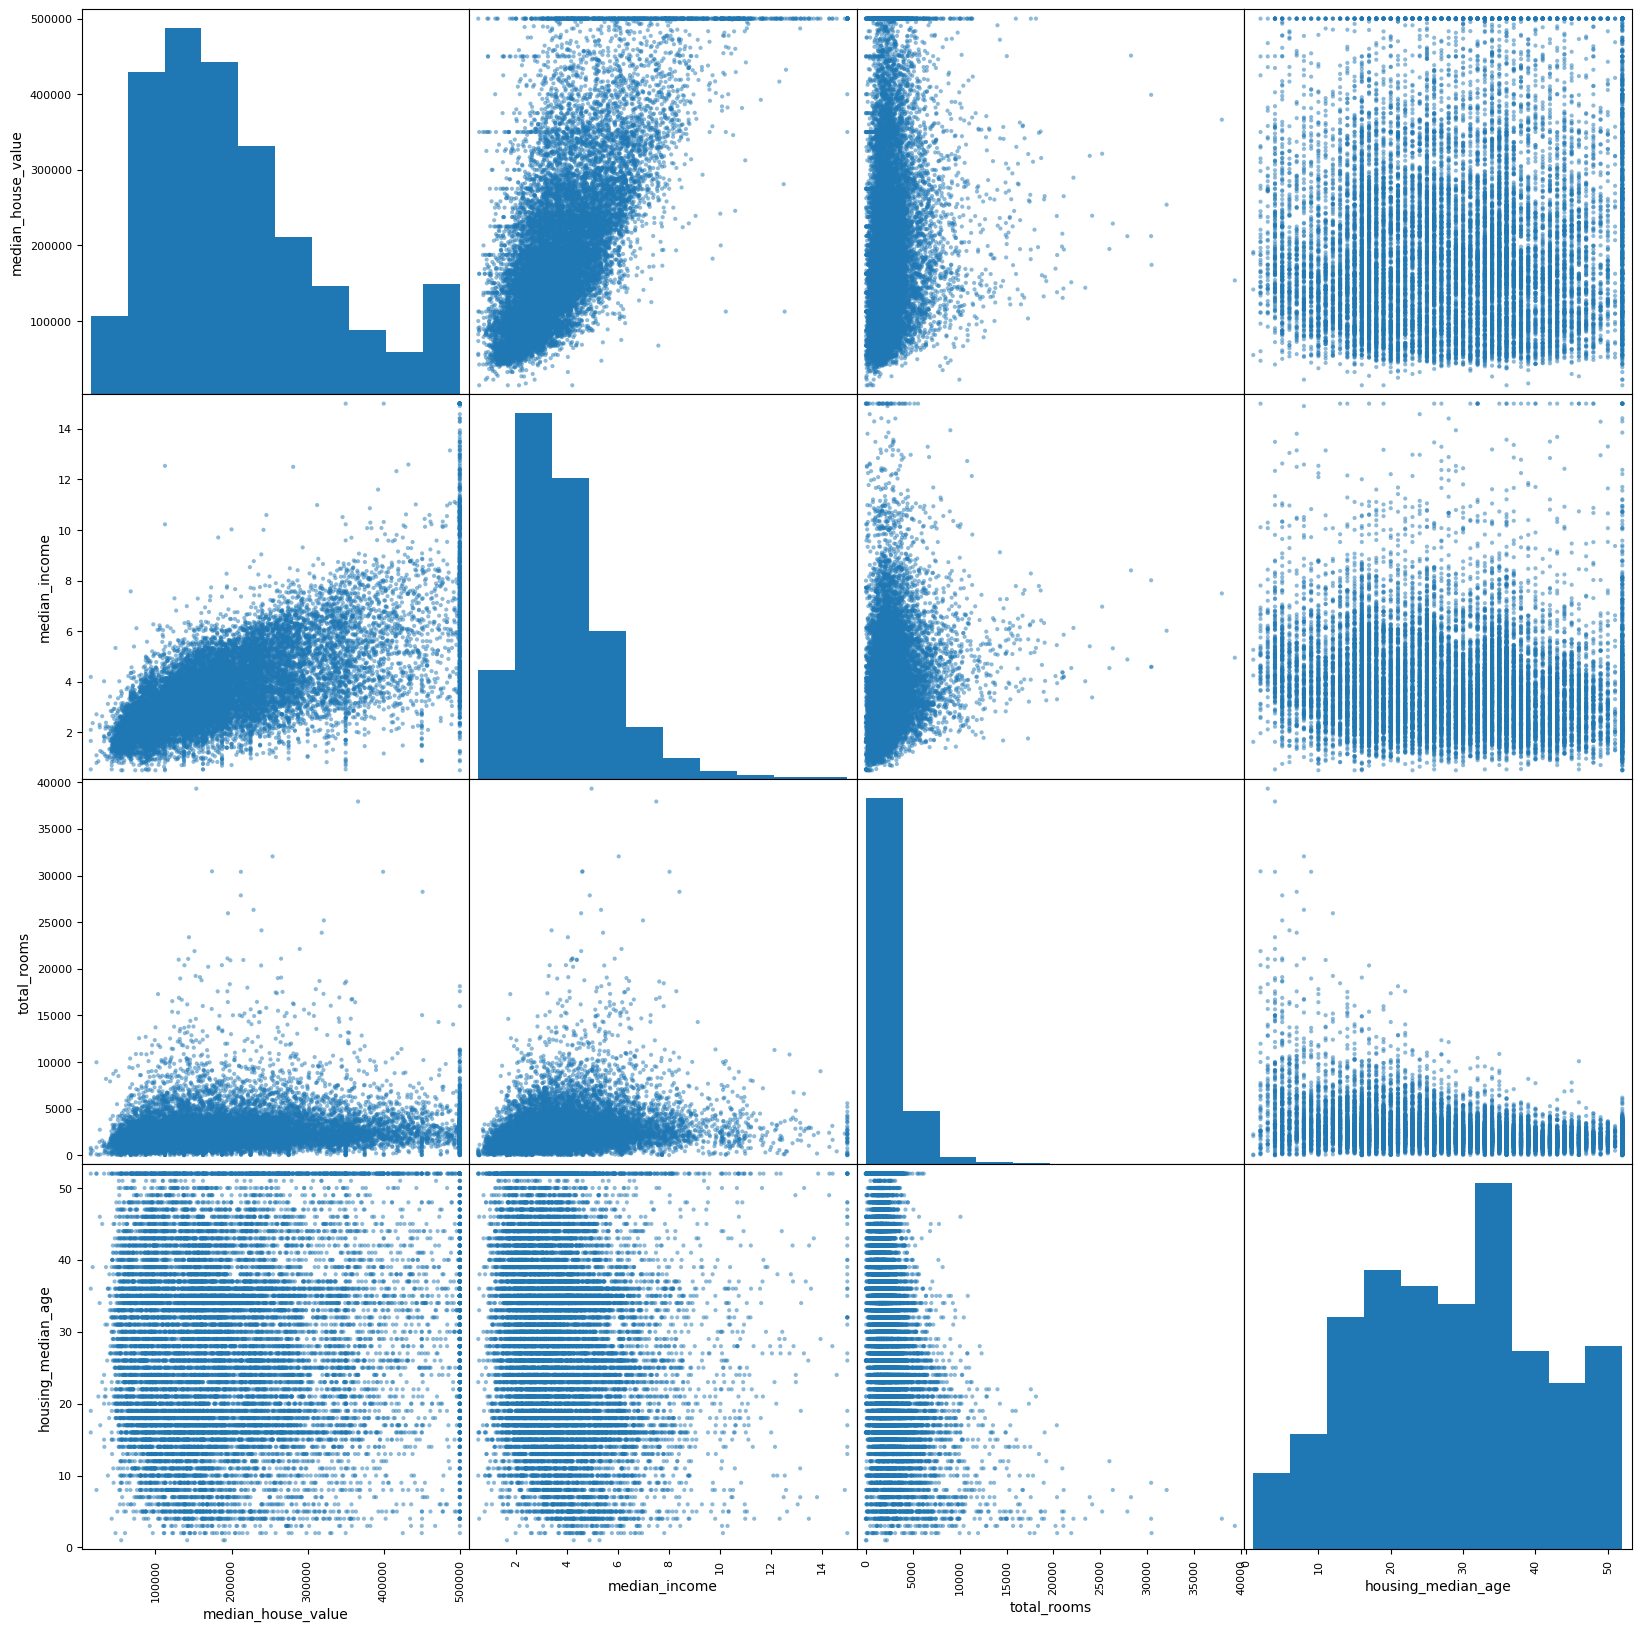

In [13]:
pd.plotting.scatter_matrix(housing.select_dtypes(["float64"])[["median_house_value", "median_income", "total_rooms","housing_median_age"]], figsize=(20,20))

# Preparing the data

In [14]:
housing = strat_train_set.drop("median_house_value", axis=1) # this copies as well
housing_labels = strat_train_set["median_house_value"].copy()

In [15]:
# need to fill blanks in total_bedrooms

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# this only works on numerical data

housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [16]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2125.0000
total_bedrooms         434.0000
population            1167.0000
households             408.0000
median_income            3.5385
dtype: float64

In [17]:
x=imputer.transform(housing_num) # x is an np.ndarray
housing_tr = pd.DataFrame(x, 
                          columns=housing_num.columns, 
                          index = housing_num.index)

In [18]:
housing_cat = housing[["ocean_proximity"]]

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded =  ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [19]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [20]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # sparse matrix

housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [21]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Min max scaling

Useful when data does not have outliers. Compresses full range into a smaller range, linearly

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

## Standard scaling

Does not squeeze into a range, instead subtracts mean and divides by standard deviation. Useful if we don't want a few outliers to distort rest of data

In [23]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

## Radial basis function

Useful for multimodal distributions, calculates similarity to each mode

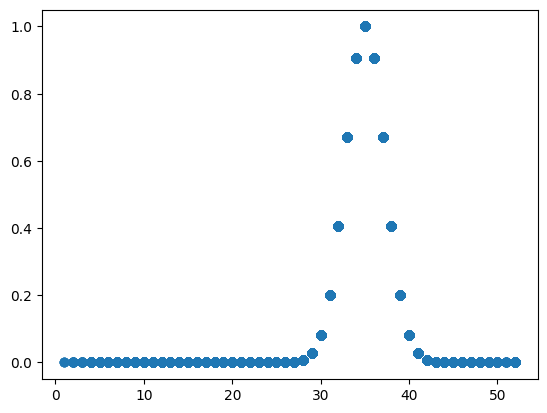

In [24]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)
plt.scatter(housing["housing_median_age"], age_simil_35)

In [25]:
housing["housing_median_age"]

13096    52.0
14973    40.0
3785     33.0
14689    17.0
20507    36.0
         ... 
14207    41.0
13105    23.0
19301    13.0
19121    37.0
19888    44.0
Name: housing_median_age, Length: 16512, dtype: float64

We can do the inverse of a scaling

In [26]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
# scales the house value data using a standard scaler
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# trains the model, seeing how median income affects scaled value
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)

# pretend we get some new data to predict
new_data = housing[["median_income"]].iloc[:5]

scaled_predictions = model.predict(new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

Or do it all in one

In [27]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(new_data)

print(f"Predicted data: {predictions}")


Predicted data: [131997.15275877 299359.35844434 146023.37185694 138840.33653057
 192016.61557639]


In [28]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, x, y=None):
        x=check_array(x)
        self.mean_ = x.mean(axis=0)
        self.scale_ = x.std(axis=0)
        self.n_features_in_ = x.shape[1]

    def transform(self, x):
        check_is_fitted(self)
        x=check_array(x)
        assert self.n_features_in_ == x.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [29]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [30]:
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


## Handling differernt data types

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


# long method

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

# short method
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)


housing_prepared = preprocessing.fit_transform(housing)

In [32]:
housing_prepared ## no longer a DataFrame

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

## Combining everything

In [33]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [35]:
from sklearn.preprocessing import FunctionTransformer
def column_ratio(x):
    return x[:, [0]]/x[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler(),
    )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out="one-to-one"),
    StandardScaler()
)

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=0.1, random_state=42)
default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler(),
    )

preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [36]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(16512, 25)

In [38]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

In [39]:
housing_prepared[:5]

array([[ 1.84662439e+00, -8.66027373e-01, -3.30203718e-01,
         1.32411352e+00,  6.37892095e-01,  4.56906246e-01,
         1.31036907e+00, -1.07152161e+00,  1.96786825e-01,
         9.97086658e-01,  4.38431924e-02,  4.58461798e-03,
         3.89507788e-01,  7.73234747e-01,  4.84411094e-01,
         2.23217143e-02,  8.16321227e-01,  9.46000619e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.86111875e+00,
        -9.54687050e-01],
       [-5.08120701e-01,  2.45495041e-02, -2.53616312e-01,
        -2.52670774e-01, -6.35755068e-02, -7.11654159e-01,
        -1.42030295e-01,  1.19471160e+00,  8.07675778e-01,
         4.99858875e-02,  9.98020375e-01,  6.99990167e-01,
         4.69764086e-01,  4.37183193e-02,  2.23030287e-03,
         9.40898170e-01,  1.33026608e-01,  1.08568003e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  9.07629710e-01,
         1.89007821e+00],
    

# Training a model

## Basic linear regression

Doesn't work very well:

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

housing_predictions = lin_reg.predict(housing)

housing_predictions[:5].round(-2)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([262000., 381400., 131000., 104500., 315300.])

In [42]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [43]:
# mean squared error

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

66991.20164498019

## Trying a more complex model

This ends up overfitting the data

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(gamma=0.1,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000171A631D710>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [46]:
housing_predictions = tree_reg.predict(housing)

tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                                squared=False)
tree_rmse

0.0

## Cross validation

In [53]:
from sklearn.model_selection import cross_val_score

# use - as cross_val_score uses a higher is better metric
tree_rmses = -cross_val_score(
    tree_reg, 
    housing, 
    housing_labels, 
    scoring="neg_root_mean_squared_error", 
    cv=10);


c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

count       10.000000
mean     66493.748943
std       1792.445198
min      64126.687006
25%      65290.464988
50%      66191.728149
75%      67934.489600
max      69344.144727
dtype: float64

In [48]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66493.748943
std       1792.445198
min      64126.687006
25%      65290.464988
50%      66191.728149
75%      67934.489600
max      69344.144727
dtype: float64

Traning error is low, validation error is high, means we had severe overfitting

In [49]:
# doing the same for linear regression

lin_reg_rmses = -cross_val_score(
    lin_reg, 
    housing, 
    housing_labels, 
    scoring="neg_root_mean_squared_error", 
    cv=10)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

In [50]:
pd.Series(lin_reg_rmses).describe()

count       10.000000
mean     68104.206136
std       3699.907147
min      64485.775015
25%      66551.241849
50%      66847.294080
75%      68293.312899
max      77924.920987
dtype: float64

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

## Tuning models

In [55]:
from sklearn.model_selection import GridSearchCV

# Book uses random forest here, I
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    #{'preprocessing__geo__n_clusters': [5, 8, 10],
    # 'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000171A631D710>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [8, 10]}],
             scoring='neg_root_mean_squared_error')

In [56]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 8}

## Random search

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}


rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000171A635B850>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000171CC828A10>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [62]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.04, 0.05, 0.01, 0.01, 0.01, 0.01, 0.16, 0.01, 0.01, 0.01,
       0.03, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.03, 0.02, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.01, 0.13])

In [63]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.15959256814845776, 'log__median_income'),
 (0.13228667574319658, 'remainder__income_cat'),
 (0.06259937407607447, 'cat__ocean_proximity_INLAND'),
 (0.0472857969351762, 'people_per_house__ratio'),
 (0.04617698159221685, 'bedrooms__ratio'),
 (0.03568450833445134, 'rooms_per_house__ratio'),
 (0.03308715725537406, 'geo__Cluster 3 similarity'),
 (0.028272059745715908, 'geo__Cluster 17 similarity'),
 (0.023274265141867985, 'geo__Cluster 18 similarity'),
 (0.016458730300564328, 'geo__Cluster 6 similarity'),
 (0.01589754801455852, 'geo__Cluster 41 similarity'),
 (0.014520494496814697, 'geo__Cluster 21 similarity'),
 (0.014126261913063938, 'geo__Cluster 40 similarity'),
 (0.013826058378184267, 'geo__Cluster 22 similarity'),
 (0.013715526086629059, 'geo__Cluster 35 similarity'),
 (0.013571826301203422, 'geo__Cluster 26 similarity'),
 (0.013351780061249008, 'geo__Cluster 32 similarity'),
 (0.012979474631079263, 'geo__Cluster 2 similarity'),
 (0.012138382085307318, 'geo__Cluster 31 similarity'

## Compare to test set

In [64]:
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(x_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

42119.25761574226


In [65]:
from scipy import stats
confidence = 0.95

squared_errors = (final_predictions - y_test)**2

np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([39982.62778545, 44152.6126019 ])

# Exercises

In [66]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,2
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,3
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,3


In [67]:
housing_labels

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64

In [69]:
from sklearn.svm import SVR

svr_model = Pipeline([
    ("preprocessing", preprocessing),
    ("svr", SVR())
])

param_grid = [
    {"svr__kernel": ["linear"], "svr__C": [10., 100., 1000.,10000.]},
    {"svr__kernel": ["rbf"], "svr__C": [10., 100., 1000.,10000.],
     "svr__gamma": [0.01, 0.1, 1.0]}
]

grid_search = GridSearchCV(
    svr_model, 
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3)

grid_search.fit(housing.iloc[:5000], housing_labels.iloc[:5000])

c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwbar\OneDrive\Not School\Documents\Programming+Raspberry Pi\ML\Geron 3rd ed\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X,

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000171A631D710>)])),
                                       ('svr', SVR())]),
             param_grid=[{'svr__C': [10.0, 100.0, 1000.0, 10000.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [10.0, 100.0, 1000.0, 10000.0],
                          'svr__gamma': [0.01, 0.1, 1.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error')

In [70]:
grid_search.best_params_

{'svr__C': 10000.0, 'svr__gamma': 0.1, 'svr__kernel': 'rbf'}

In [71]:
final_svr_model = grid_search.best_estimator_

svr_predictions = final_svr_model.predict(x_test)

svr_rmse = mean_squared_error(y_test, final_predictions, squared=False)

svr_rmse

42119.25761574226

Try creating a custom transformer that trains a k-nearest neighbors regressor (`sklearn.neighbors.KNeighborsRegressor`) in its `fit()` method, and outputs the model’s predictions in its `transform()` method. Then add this feature to the preprocessing pipeline, using `latitude` and `longitude` as the inputs to this transformer. This will add a feature in the model that corresponds to the housing median price of the nearest districts.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted


class KNNTransformer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        x=check_array(x)

